# Name: Anushka M. Chaubal

# Topic: Exploratory Data Analysis-Retail

# Task 3

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Importing Dataset

In [2]:
data=pd.read_csv('C:/Users/anushka/Downloads/SampleSuperstore.csv')


In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


# Exploring the data

In [5]:
data.shape

(9994, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There are no null values in the dataset.

In [21]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Changing data type of postal code as object:

In [8]:
data['Postal Code']=data['Postal Code'].astype('object')

In [9]:
data.duplicated().sum()

17

# Removing duplicated values.

In [10]:
data.drop_duplicates(subset=None,keep="first",inplace=True)

In [11]:
data.duplicated().sum()

0

In [12]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [33]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# Visualization 

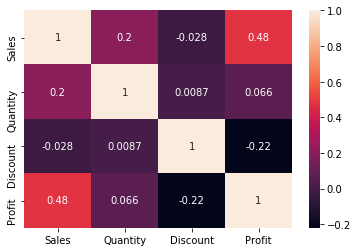

In [13]:
corr=data.corr()
sns.heatmap(corr,annot=True)

Countplots:

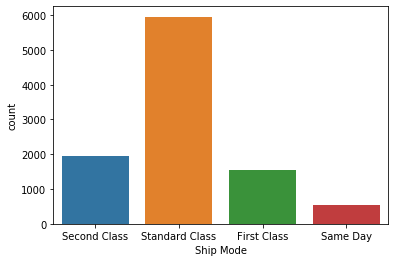

In [36]:
sns.countplot(x=data['Ship Mode'])

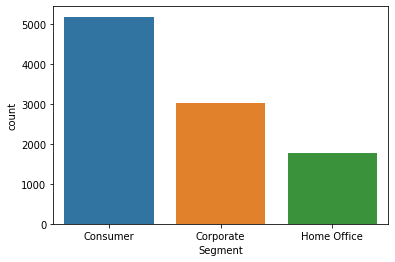

In [38]:
sns.countplot(x=data['Segment'])

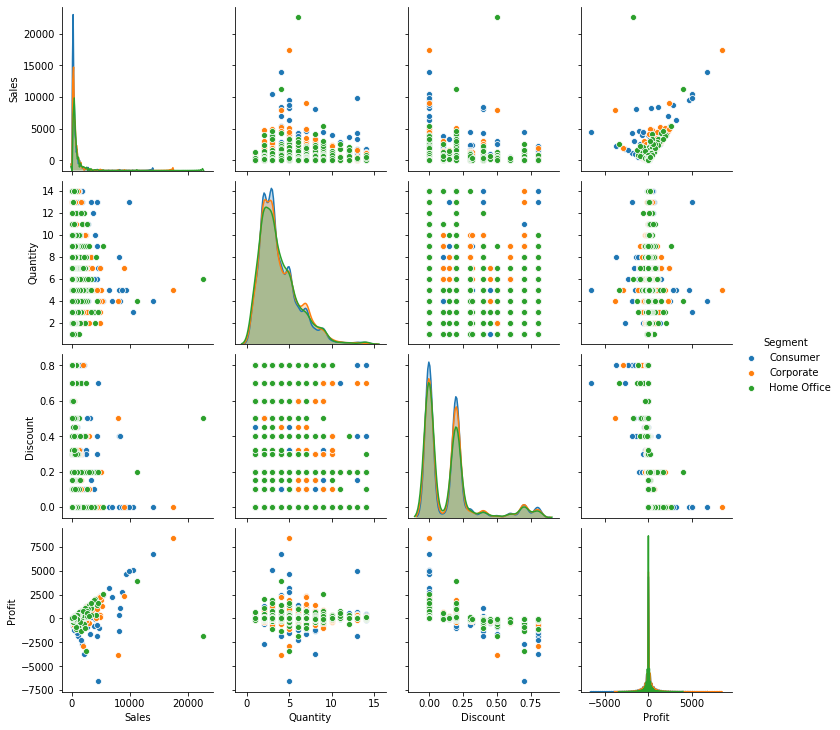

In [19]:
sns.pairplot(data,hue='Segment')
plt.show()

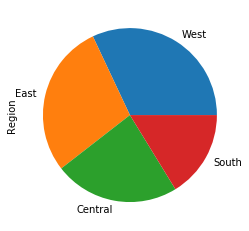

In [43]:
data['Region'].value_counts().plot.pie()
plt.show()

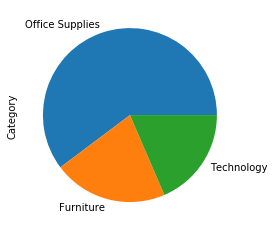

In [44]:
data['Category'].value_counts().plot.pie()
plt.show()

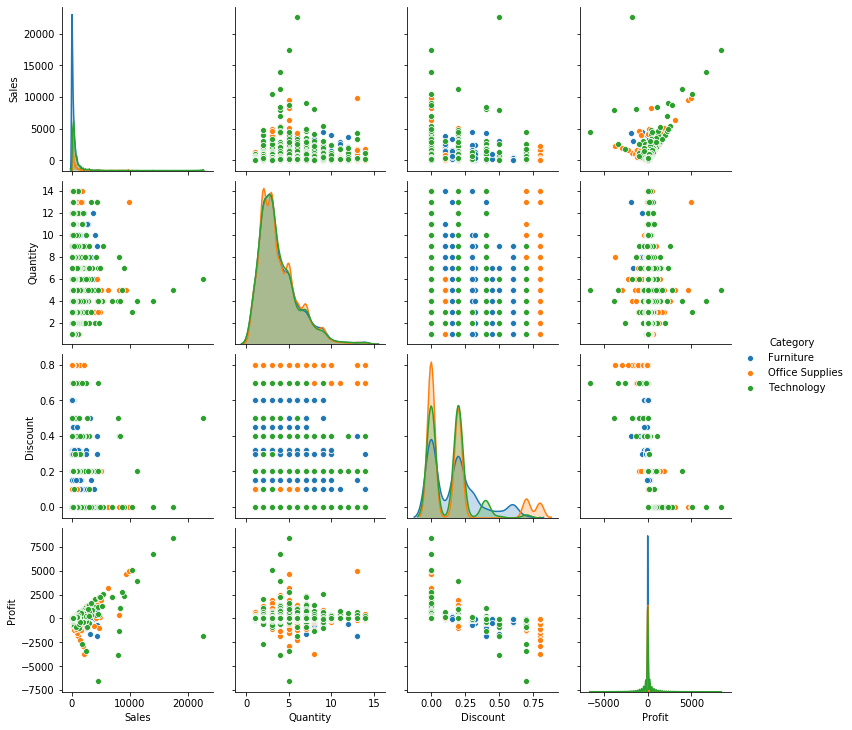

In [18]:
sns.pairplot(data,hue='Category')
plt.show()

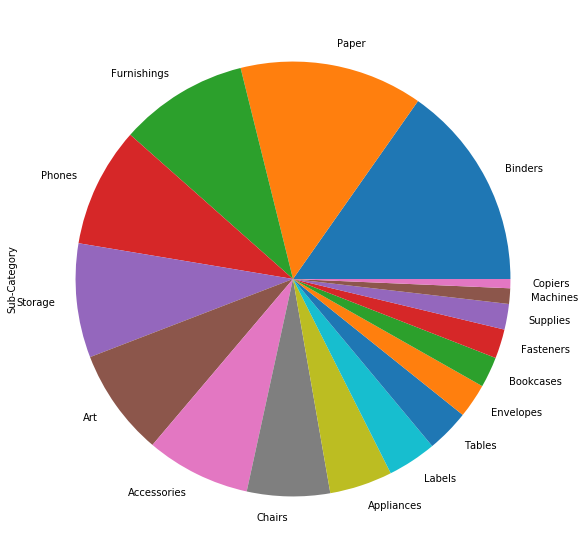

In [50]:
fig=plt.figure(figsize=(12,10))
data['Sub-Category'].value_counts().plot.pie()
plt.show()

In [14]:
data=data.drop(['Postal Code'],axis=1)
print('Column dropped')

Column dropped


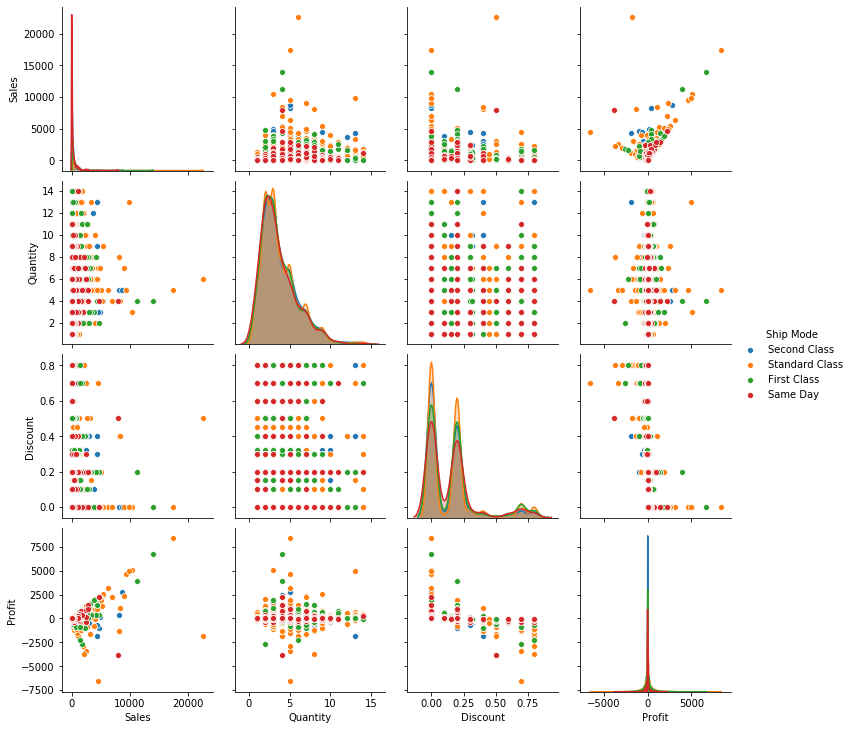

In [17]:
sns.pairplot(data,hue='Ship Mode')
plt.show()

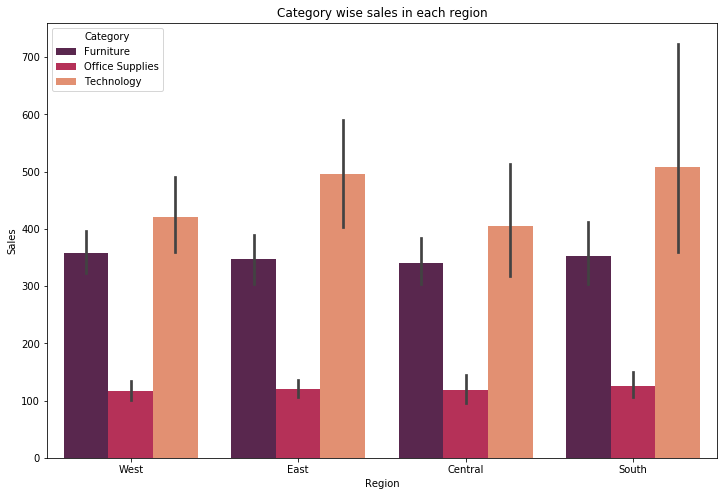

In [36]:
plt.figure(figsize=(12,8))
sns.barplot(x='Region',y='Sales',data=data,hue='Category',order=data['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Category wise sales in each region')
plt.show()

# Observations
1] In all the four regions Furniture and Technology products are sold more than Office supplies.

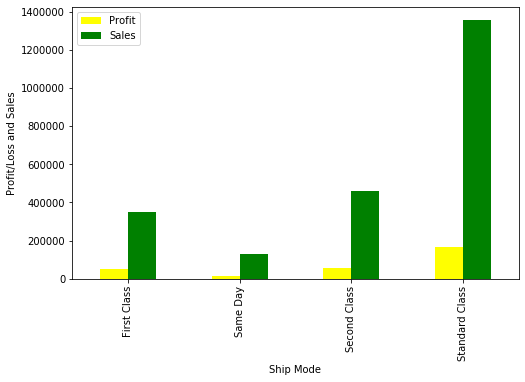

In [24]:
data.groupby('Ship Mode')[['Profit','Sales']].sum().plot.bar(color=('yellow','green'),figsize=(8,5))
plt.ylabel('Profit/Loss and Sales')
plt.xlabel('Ship Mode')
plt.show()

# Observations
1] Products shipped by second class have high profits.
2] products shipped on the same day have lowest profits

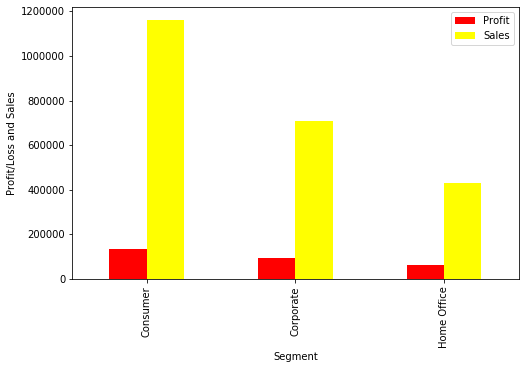

In [28]:
data.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=('red','yellow'),figsize=(8,5))
plt.ylabel('Profit/Loss and Sales')
plt.xlabel('Segment')
plt.show()

# Observations
1] Consumer segment has highest profit and sales.
2]Home Office segemnt has lowest profit and sales.

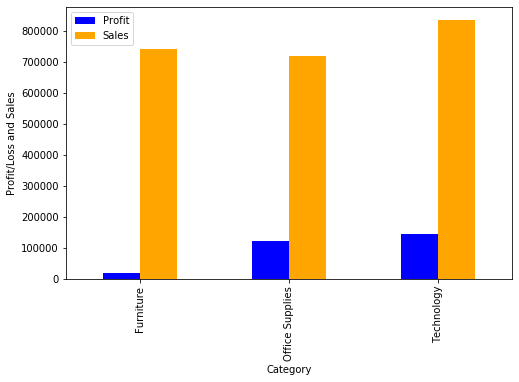

In [27]:
data.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=('blue','orange'),figsize=(8,5))
plt.xlabel('Category')
plt.ylabel('Profit/Loss and Sales')
plt.show()

# Observation
1]Technology and Office supplies contribute to the major profit earned by the superstore.
2]Furniture has less profit.

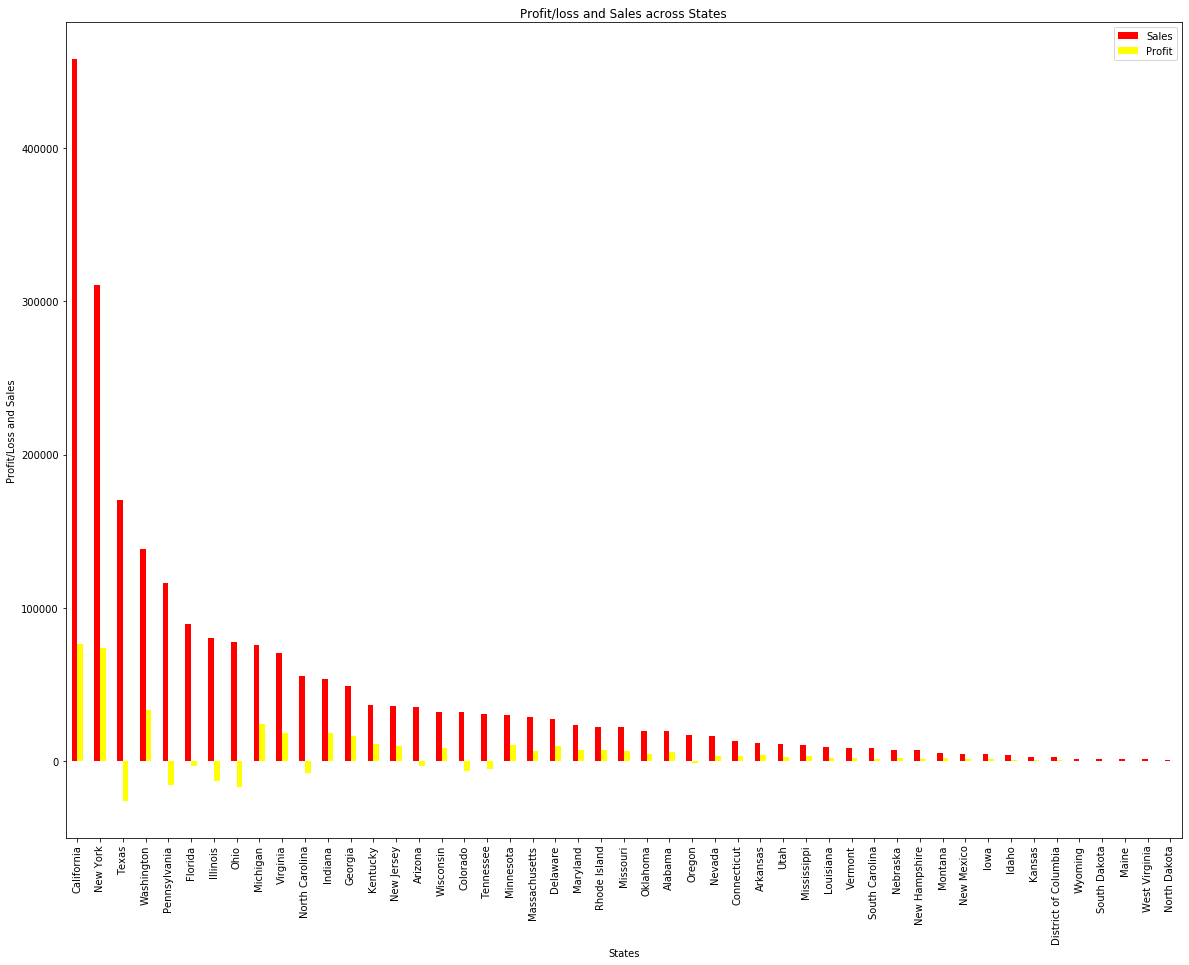

In [35]:
data.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False).plot.bar(color=('red','yellow'),figsize=(20,15))
plt.xlabel('States')
plt.ylabel('Profit/Loss and Sales')
plt.title('Profit/loss and Sales across States')
plt.show()

# Observations
1] The Business is facing loss in the following states:
   Texas,Pennsylvania,Florida,Illinois,Ohio,North Carolina,Arizona,Colorado,Tennessee.

2] The States which are bringing in maximum profits are:
    California,New York and Washington.
    